#  Test function for using auto correlation fitting in sckit-xray

In [1]:
import skxray.core.roi as roi
import skxray.core.correlation as corr
import skxray.core.utils as core

from lmfit import minimize, Parameters

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


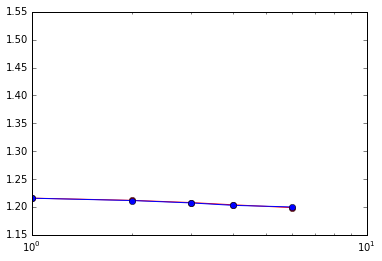

In [2]:
params1 = Parameters()
params1.add('beta',  value=0.1699, min=0.089, max=0.22)
params1.add('relaxation_rate', value=2.3456)
params1.add('baseline', value=1, min=0.8, max=1)
    
num_levels, num_bufs = 2, 4
tot_channels, lags = core.multi_tau_lags(num_levels, num_bufs)
data = np.array([1.369,  1.216,  1.212,  1.208,  1.204,
        1.199])

fit_result = corr.fit_auto_corr(params1, lags, data, eps_data=1)

plt.semilogx(lags, data, '-ro')
plt.semilogx(lags, fit_result, '-bo')
plt.show()


In [3]:
fit_result

array([ 1.518     ,  1.21585948,  1.21165125,  1.2073765 ,  1.2030364 ,
        1.20016471])

In [4]:
params1.values()

[<Parameter 'beta', value=0.21999999999999995 +/- 0, bounds=[0.089:0.22]>,
 <Parameter 'relaxation_rate', value=0.0088493936473081087 +/- 0, bounds=[-inf:inf]>,
 <Parameter 'baseline', value=1 +/- 0, bounds=[0.8:1]>]

In [5]:
from numpy.testing import (assert_array_almost_equal,
                           assert_almost_equal)

from nose.tools import assert_equal, assert_true

In [6]:
assert_array_almost_equal(data[1:], fit_result[1:], decimal=3)